In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# One Sample K-S Test

**Is the sample from an assumed population distribution?**

H0 = Yes!

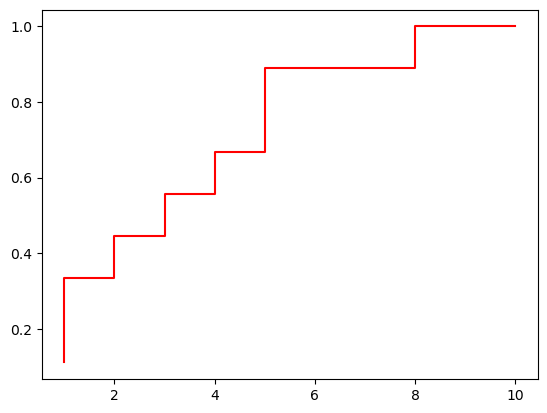

In [10]:
# Empirical CDF
F_n = lambda x : sum(r <= x) / n

r = np.array([1,3,8,2,5,8,10,2,4])
n = len(r)
xx = sorted(r)

data = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(map(F_n, xx)), 
})

plt.step( 'x', 'F_n', data=data, color='red')
plt.show()

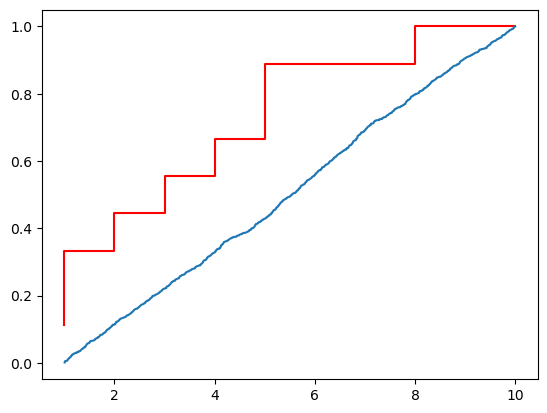

In [38]:
# CDF of Uniform Distribution
data2 = np.random.uniform(1, 10, 1000)

# Calculate the cumulative distribution function (CDF)
sorted_data = np.sort(data2)
cdf_uniform = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

data2 = pd.DataFrame({
    'x': sorted_data, 
    'F_n': cdf_uniform, 
})
plt.step( 'x', 'F_n', data=data, color='red')
plt.plot( 'x', 'F_n', data=data2)
plt.show()

In [36]:
df1_interp = pd.DataFrame()
df1_interp['value'] = np.linspace(data['x'].min(), data['x'].max(), 1000)
df1_interp['cdf'] = np.interp(df1_interp['value'], data['x'], data['F_n'])
# Calculate the absolute differences between the two CDFs
diff_cdf = np.abs(df1_interp['cdf'].values - data2['F_n'].values)
# Find the maximum difference and its corresponding value
max_diff = np.max(diff_cdf)
max_diff_index = np.argmax(diff_cdf)
max_diff_value = df1_interp['value'].iloc[max_diff_index]

print("Maximum vertical distance between the two CDFs:", max_diff)
print("Value at which maximum vertical distance occurs:", max_diff_value)


Maximum vertical distance between the two CDFs: 0.22166666666666662
Value at which maximum vertical distance occurs: 5.0


For n= 9, critical value ot 0.05 alpha is **0.432** (From K-S test table)

Since the D value we calculated (0.221) is less than the critical value -- **we cannot reject the null hypothesis** of K-S test that sample comes from the assumed population distribution.

PS: We calculated the D distance using interpolated function (not step function) - the actual D would vary. We'll see it in the scipy implementation below.

In [41]:
from scipy.stats import kstest, ks_2samp
ks_statistic, p_value = kstest(r, 'uniform', args=(1, 10))

# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Data does not follow the specified distribution.")
else:
    print("Fail to reject the null hypothesis: Data follows the specified distribution.")


KS Statistic: 0.2666666666666666
P-value: 0.46613395175197536
Fail to reject the null hypothesis: Data follows the specified distribution.


# Two-Sample Test

**Are the two samples coming from the same population distribution?**

H0 = Yes!

Same test as above. Just that we calculate max vertical distance between two empirical CDFs. Meaning -- we are actually comparing if two samples come from the same population distribution (no matter what it is!). Beauty of non-parametric tests!

# References
1. [A very good explainer on how the critical D values are generated](https://stats.stackexchange.com/questions/471732/intuitive-explanation-of-kolmogorov-smirnov-test)
2. [K-S 2 sample Python from scratch](https://www.linkedin.com/pulse/exploring-two-sample-kolmogorov-smirnov-test-yevhen-kralych/)